# Exercise 3 - Instance-Based Learning

*Author: Papagrigoriou Vasileios Savvas*

# Exercise 1

## KNN Classification

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt,floor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from tabulate import tabulate

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the csv file
df=pd.read_csv('wine_quality.csv')

# Remove the null values
df.dropna(inplace=True)

# Drop quaity column and store it in target_columns
df.drop('quality',axis=1,inplace=True)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,red,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,rose,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,red,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,red,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,red,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [3]:
feature_columns=df[df.drop('type',axis=1).columns]
target_columns=df['type']

In [4]:
# Set the values
un_neighbors=[5,10,floor(sqrt(len(df))),100]
uweights=['uniform','distance']
up=[1,2]

In [5]:
X_test,X_train,y_test,y_train=train_test_split(feature_columns,target_columns,test_size=0.3,random_state=0)

In [6]:
# From the values of n_neighbors, weights and p
# fit each model and predict the accuracy score
KNN_models=[]
for i in un_neighbors:
    for j in uweights:
        for k in up:
            knn=KNeighborsClassifier(n_neighbors=i,weights=j,p=k)
            knn.fit(X_train,y_train)
            y_pred=knn.predict(X_test)
            KNN_models.append([knn,i,j,k,accuracy_score(y_test,y_pred)])

# Sort by accuracy score
KNN_models.sort(key=lambda x:x[4],reverse=True)     
# Display table of models
print(tabulate([knn[1:] for knn in KNN_models],headers=['n_neighbors','weights','p','accuracy_score'],tablefmt='fancy_grid'))

╒═══════════════╤═══════════╤═════╤══════════════════╕
│   n_neighbors │ weights   │   p │   accuracy_score │
╞═══════════════╪═══════════╪═════╪══════════════════╡
│            80 │ distance  │   1 │         0.727011 │
├───────────────┼───────────┼─────┼──────────────────┤
│           100 │ distance  │   1 │         0.726127 │
├───────────────┼───────────┼─────┼──────────────────┤
│            10 │ distance  │   1 │         0.723696 │
├───────────────┼───────────┼─────┼──────────────────┤
│            10 │ distance  │   2 │         0.723254 │
├───────────────┼───────────┼─────┼──────────────────┤
│            80 │ distance  │   2 │         0.721706 │
├───────────────┼───────────┼─────┼──────────────────┤
│           100 │ distance  │   2 │         0.721706 │
├───────────────┼───────────┼─────┼──────────────────┤
│            80 │ uniform   │   1 │         0.70756  │
├───────────────┼───────────┼─────┼──────────────────┤
│           100 │ uniform   │   1 │         0.70557  │
├─────────

In [7]:
# Split for each type
white,red,rose=df[df['type']=='white'],df[df['type']=='red'],df[df['type']=='rose']

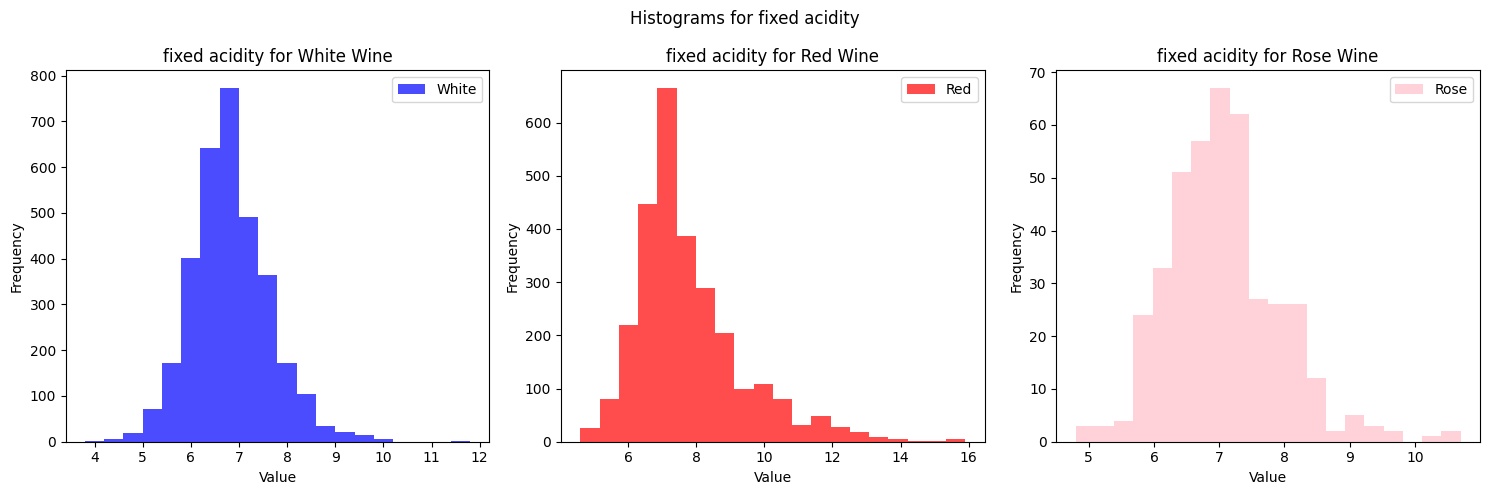

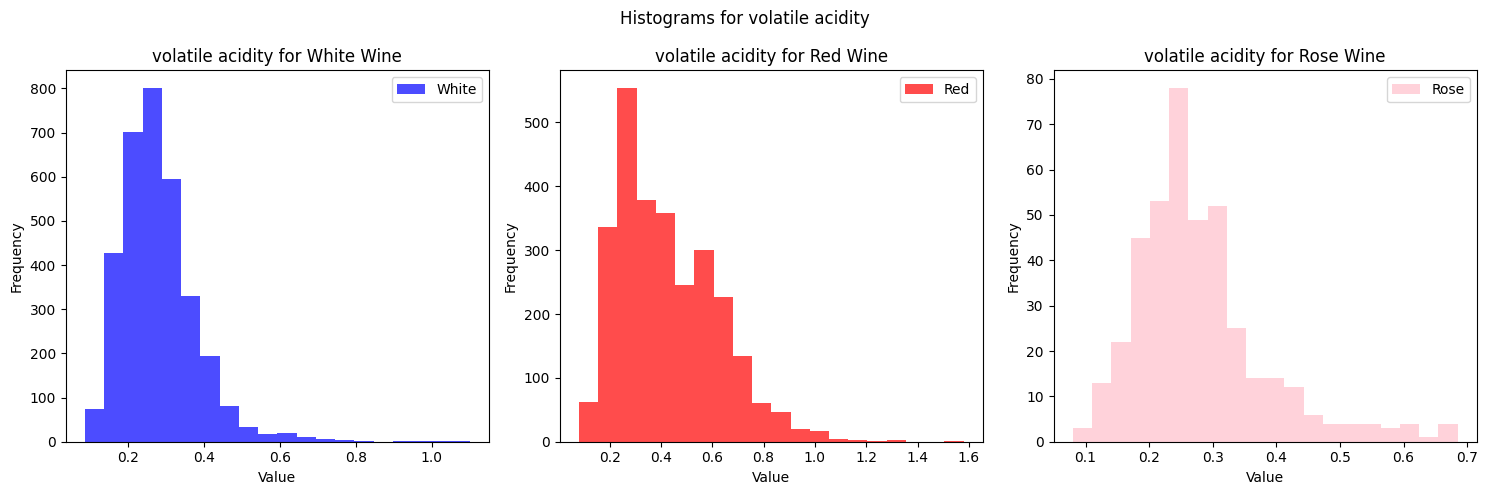

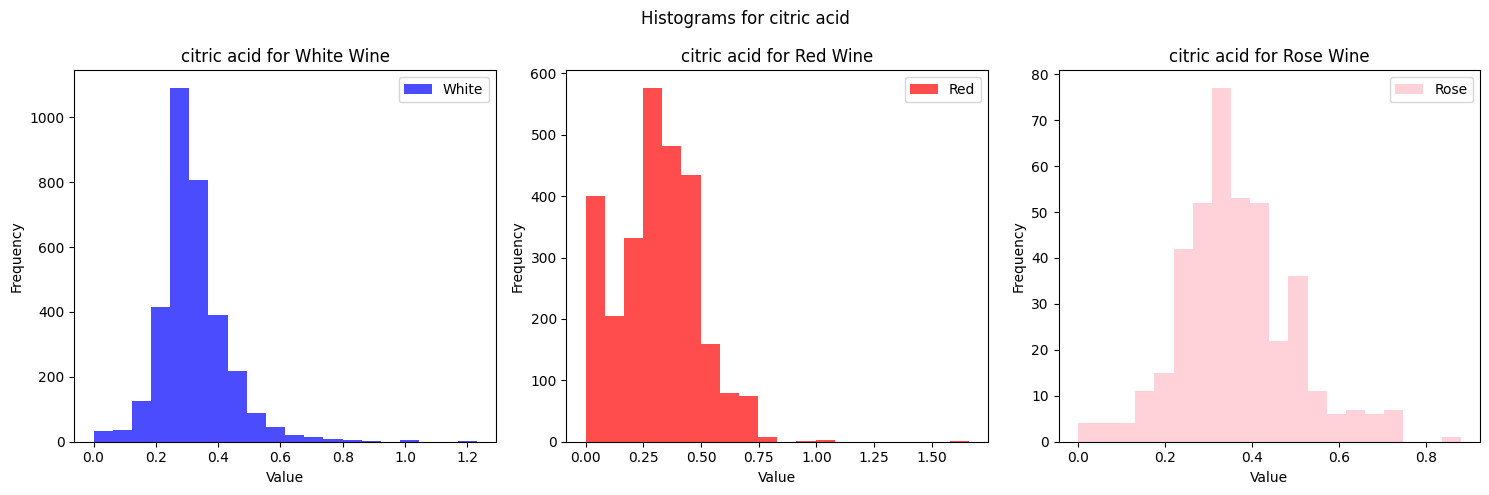

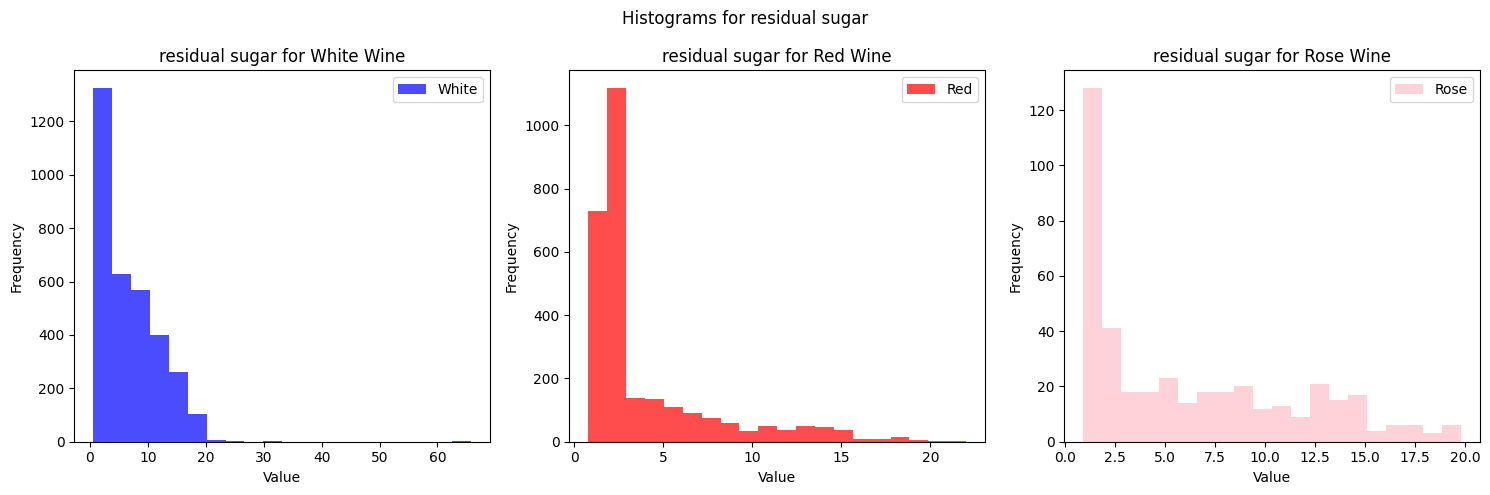

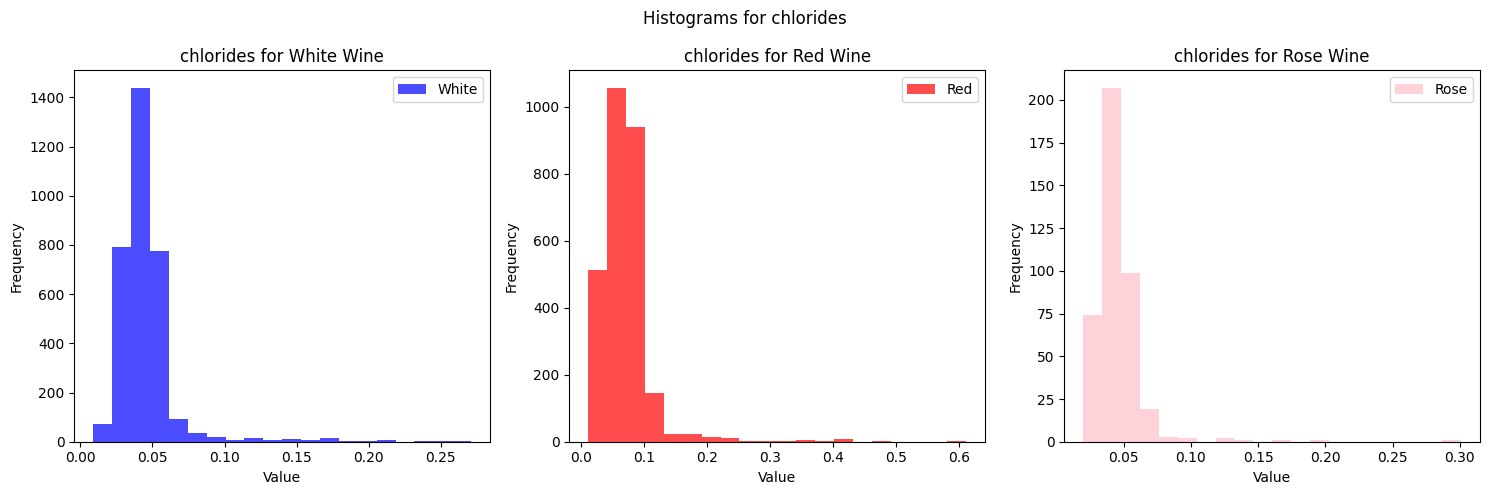

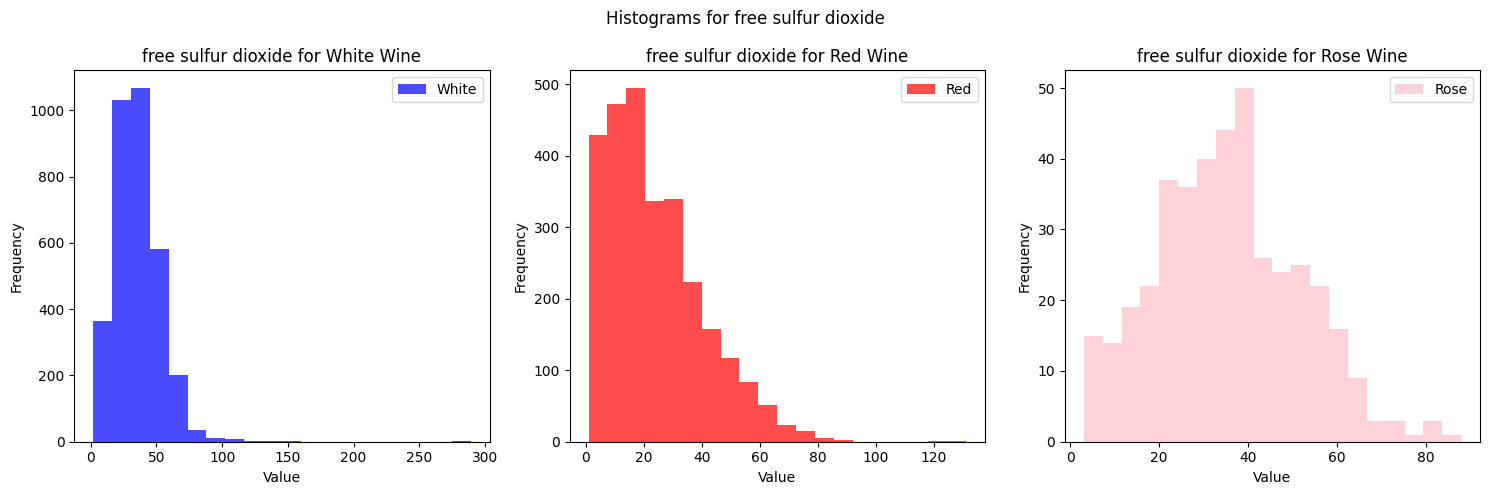

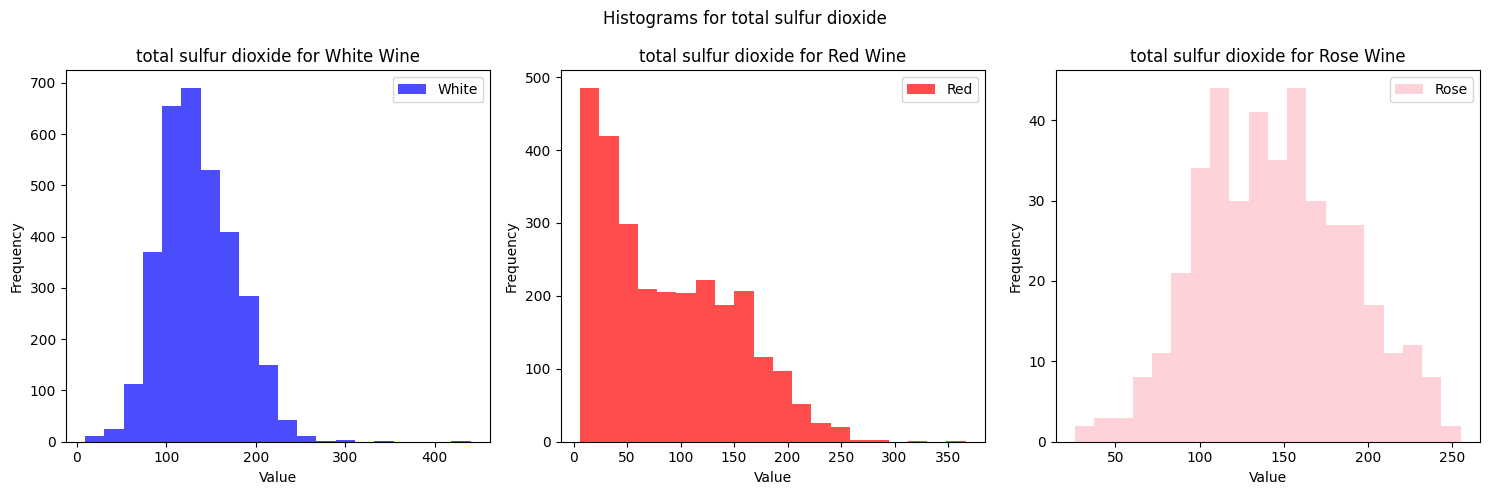

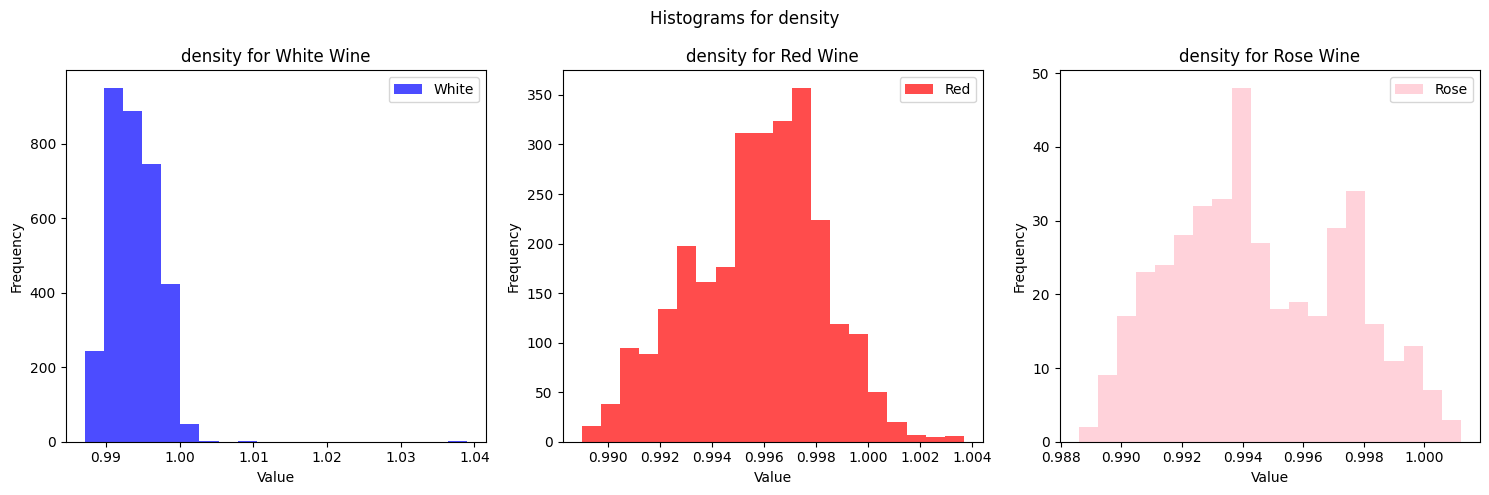

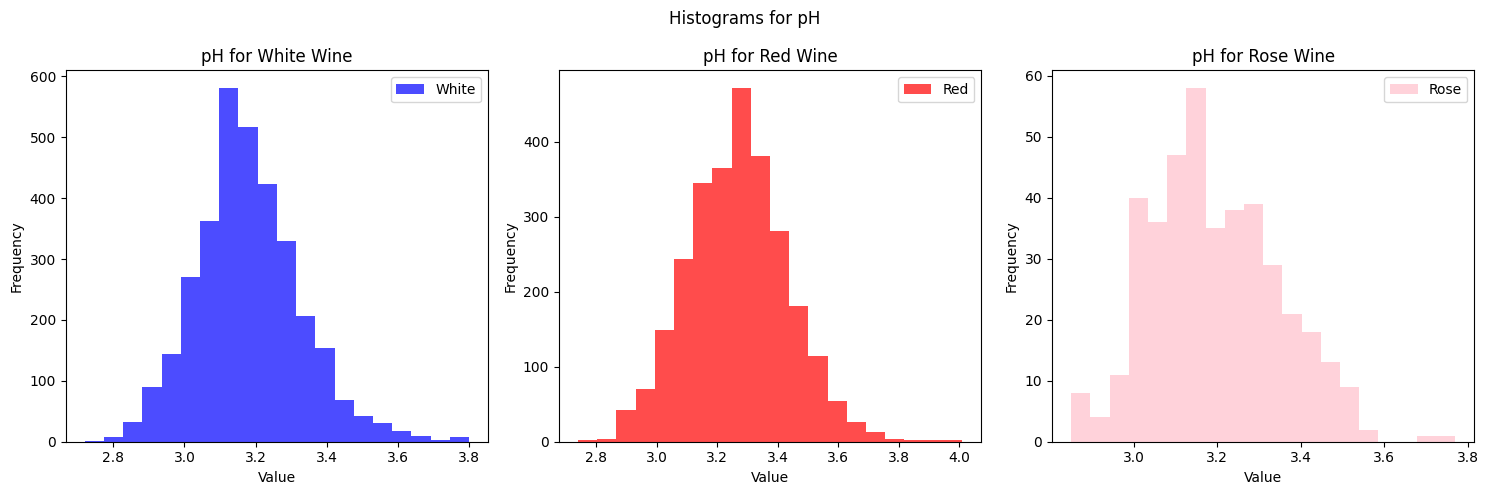

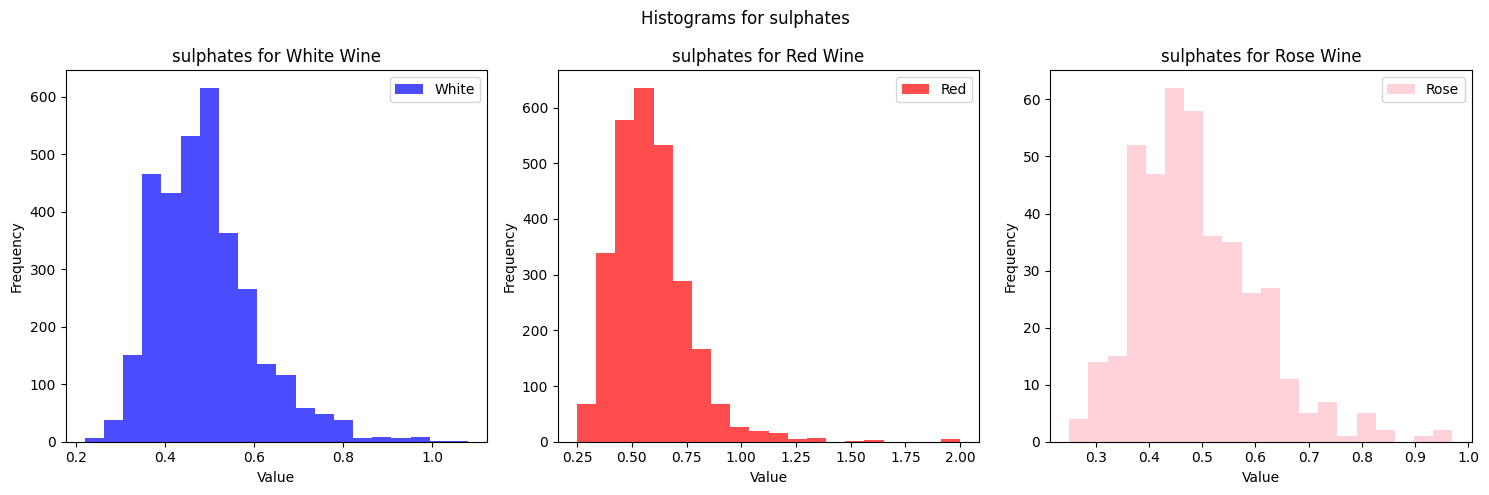

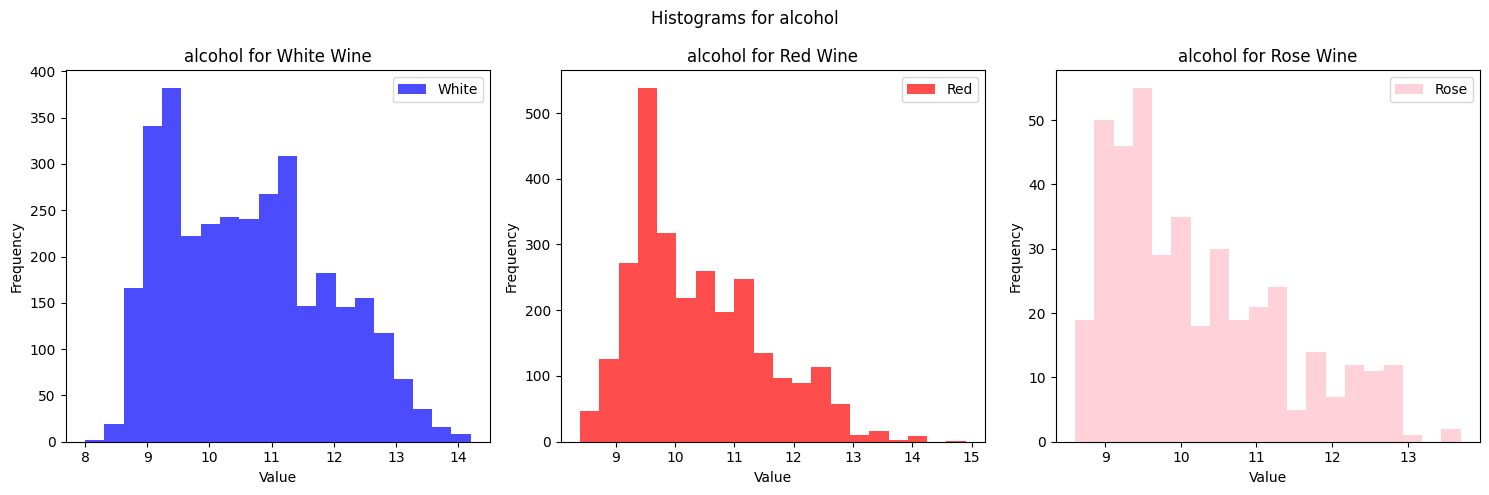

In [8]:
# Creating histograms for each wine type, displayed in separate figures
for feature in feature_columns.columns:
    # Make 3 subplots for each wine type
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
     # Plotting histograms for each of the selected features
    for index,wine_type in enumerate([white,red,rose]):
        
        # Set wine_color for label
        wine_color = wine_type['type'].iloc[0].capitalize()
        
        # plot color
        color = 'red' if wine_color == 'Red' else 'blue' if wine_color == 'White' else 'pink'
        
        # Plot the histogram for the current wine type
        axes[index].hist(wine_type[feature], bins=20, alpha=0.7, label=wine_color, color=color)
        axes[index].legend()
        axes[index].set_title(f'{feature} for {wine_color} Wine')
        axes[index].set_xlabel('Value')
        axes[index].set_ylabel('Frequency')

    # Adjust layout and show plot
    plt.suptitle(f'Histograms for {feature}')
    plt.tight_layout()
    plt.show()

##### Considering the Impact on KNN Performance

* Overall Features
    * We can see that the _White_ and _Red_ wine have more values in frequencies [200-900] in the other hand the _Rose_ wine has value in frequencies [20-50]. This disparity in frequency distribution suggests that the _Rose_ wine's features might have a different scale or variability, which can significantly affect distance-based algorithms like KNN.
* Free sulfur dioxide
    * The feature **free sulfur dioxide** exhibits considerable variance across its values, indicating a wide spread in the data. Such variation can lead to certain distances being overemphasized, potentially skewing the KNN algorithm's predictions.
* pH 
    * When comparing **pH** levels, _White_ wine exhibits higher frequency peaks than _Red_ wine. This could be significant for KNN, as **pH** might serve as a differentiator between these two wine types.
* Residual sugar 
    * Looking at the histograms, the _White_ wine tends to have more variation in **residual sugar**, while _Red_ and _Rose_ wines show less variation. This means that residual sugar could be a key feature for the KNN to look at, especially for distinguishing _White_ wines from the others.

### Feature Importance

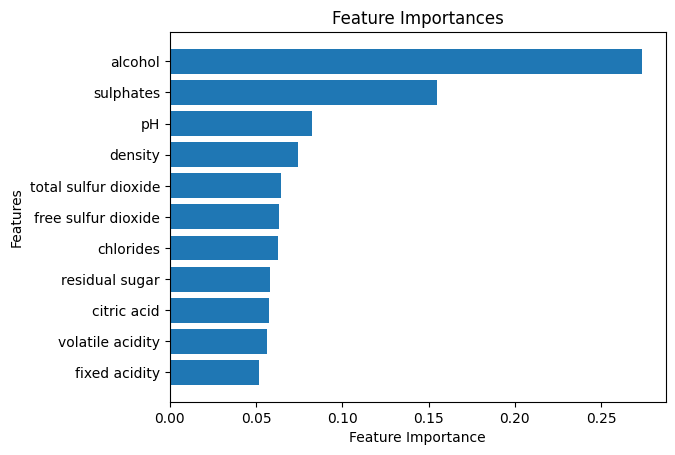

In [9]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create the model
dtc=DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)

best_features=dtc.feature_importances_
best_features.sort()

# Plot the feature importances
plt.barh(feature_columns.columns,best_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

##### Drop the less important feature

In [10]:
# Drop the fixed acidity
new_feature_columns=feature_columns.drop(['fixed acidity'],axis=1)

In [11]:
# split the data
X_test,X_train,y_test,y_train=train_test_split(new_feature_columns,target_columns,test_size=0.3,random_state=0)

In [12]:
knn_model = KNeighborsClassifier(n_neighbors=floor(sqrt(len(df))),weights='distance',p=1)
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)

# Print the accuracy score
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')

Accuracy Score: 0.7250221043324492


##### New accuracy

Using _fixed acidity_ in our features the accuracy was **0.727**, without that feature the accuracy went down to **0.725**

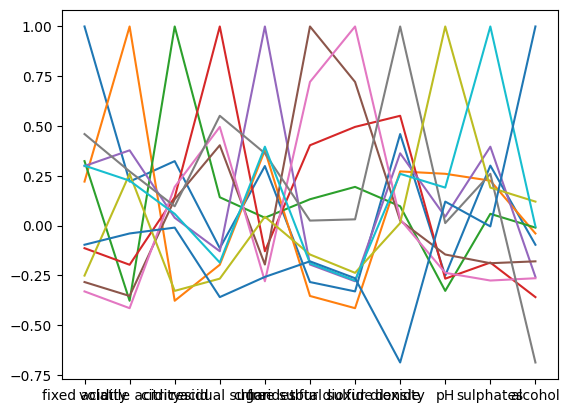

In [13]:
matrix = feature_columns.corr()
plt.plot(matrix)

##### I believe that a heatmap may be more useful for checking correlations, so I've also plotted one to gain a better understanding.

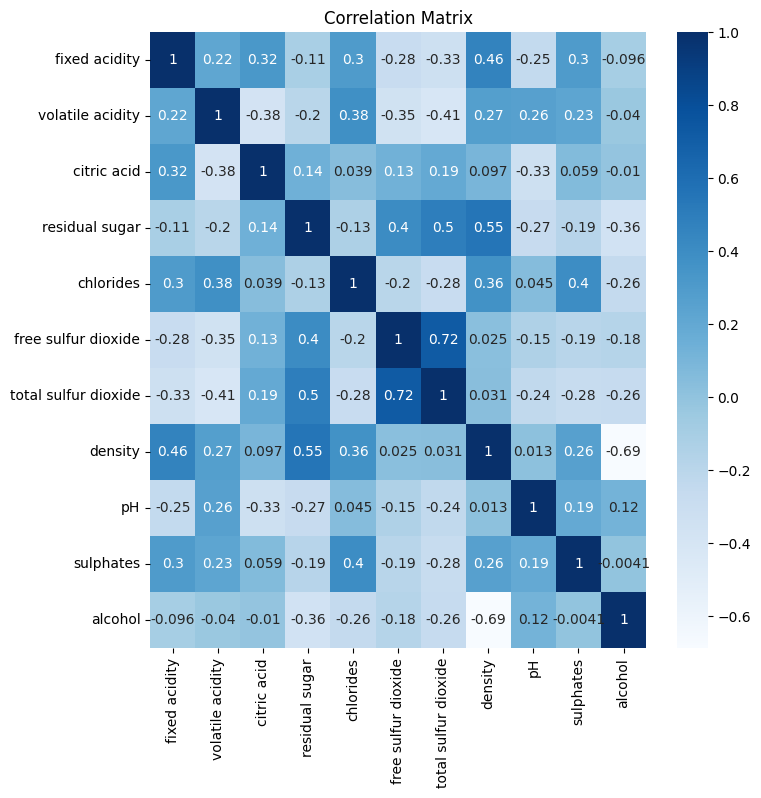

In [14]:
import seaborn as sns

plt.figure(figsize=(8,8))
plt.title('Correlation Matrix')
sns.heatmap(matrix,annot=True,cmap='Blues')
plt.show()


##### Correlation 

Based on the previous heatmap the *fixed acidity* has a 46% correlation with the *density* which is an important feature as we see from the Decision Tree

### Normalization

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Create the scaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
# Model Initialization
knn_modelE = KNeighborsClassifier(n_neighbors=floor(sqrt(len(df))),weights='distance',p=2)
knn_modelM = KNeighborsClassifier(n_neighbors=floor(sqrt(len(df))),weights='distance',p=1)

In [17]:
# Fit the models
knn_modelE.fit(X_train,y_train)
knn_modelM.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=80, p=1, weights='distance')

In [18]:
# Predictions
y_predE=knn_modelE.predict(X_test)
y_predM=knn_modelM.predict(X_test)

In [19]:
# Print the accuracy score
print(f'Accuracy Score Manhattan: {accuracy_score(y_test,y_predM)}')
print(f'Accuracy Score Euclidean: {accuracy_score(y_test,y_predE)}')

Accuracy Score Manhattan: 0.7667992926613616
Accuracy Score Euclidean: 0.7674624226348364


# Exercise 2

## KNN Regression

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


In [21]:
df=pd.read_csv('wine_quality.csv')

def encoding_and_bind(df):
    dummies = pd.get_dummies(df['type'])
    res = pd.concat([df,dummies],axis=1)
    df = res.drop ( columns=['type'] )
    return df.dropna()
df = encoding_and_bind(df)


In [22]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,rose,white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,True,False,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,False,True,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,True,False,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,True,False,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,True,False,False


In [23]:
target_columns=df['quality']
feature_columns=df[df.drop('quality',axis=1).columns]

In [24]:
X_test,X_train,y_test,y_train=train_test_split(feature_columns,target_columns,test_size=0.3,random_state=0)

In [25]:
# From the values of n_neighbors, weights and p
# fit each model and predict the accuracy score
KNN_models=[]
for i in un_neighbors:
    for j in uweights:
        for k in up:
            knn=KNeighborsRegressor(n_neighbors=i,weights=j,p=k)
            knn.fit(X_train,y_train)
            y_pred=knn.predict(X_test)
            KNN_models.append([knn,i,j,k,mean_squared_error(y_test,y_pred)])

# Sort by accuracy score
KNN_models.sort(key=lambda x:x[4])     
# Display table of models
print(tabulate([knn[1:] for knn in KNN_models],headers=['n_neighbors','weights','p','MAE'],tablefmt='fancy_grid'))

╒═══════════════╤═══════════╤═════╤══════════╕
│   n_neighbors │ weights   │   p │      MAE │
╞═══════════════╪═══════════╪═════╪══════════╡
│            10 │ distance  │   1 │ 0.573407 │
├───────────────┼───────────┼─────┼──────────┤
│            80 │ distance  │   1 │ 0.590722 │
├───────────────┼───────────┼─────┼──────────┤
│           100 │ distance  │   1 │ 0.593716 │
├───────────────┼───────────┼─────┼──────────┤
│            10 │ distance  │   2 │ 0.606906 │
├───────────────┼───────────┼─────┼──────────┤
│             5 │ distance  │   1 │ 0.607119 │
├───────────────┼───────────┼─────┼──────────┤
│            80 │ distance  │   2 │ 0.616548 │
├───────────────┼───────────┼─────┼──────────┤
│           100 │ distance  │   2 │ 0.6185   │
├───────────────┼───────────┼─────┼──────────┤
│             5 │ distance  │   2 │ 0.643909 │
├───────────────┼───────────┼─────┼──────────┤
│            10 │ uniform   │   1 │ 0.653263 │
├───────────────┼───────────┼─────┼──────────┤
│            

# Bonus

## LDA

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [27]:
# Create the LDA
lda=LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=2)

In [28]:
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

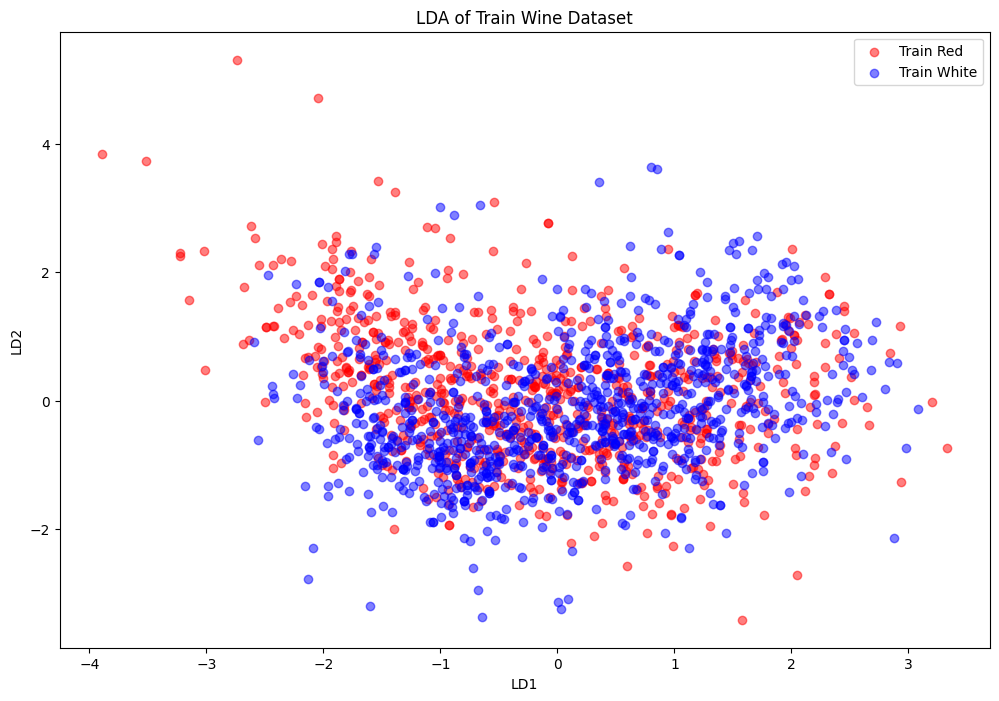

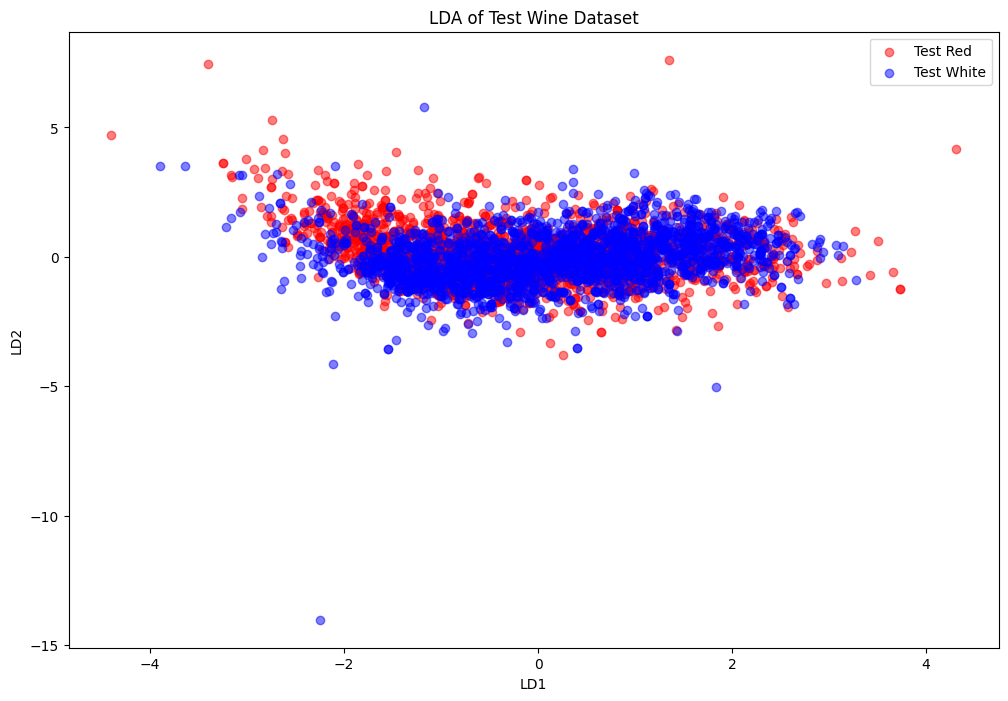

In [29]:
# SPlit the data for each type
train_red = X_train_lda[X_train['red']]
train_white = X_train_lda[X_train['white']]
test_red = X_test_lda[X_test['red']]
test_white = X_test_lda[X_test['white']]

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(train_red[:, 0], train_red[:, 1], color='red', alpha=0.5, label='Train Red')
plt.scatter(train_white[:, 0], train_white[:, 1], color='blue', alpha=0.5, label='Train White')
plt.title('LDA of Train Wine Dataset')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
plt.scatter(test_red[:, 0], test_red[:, 1], color='red', alpha=.5,  label='Test Red')
plt.scatter(test_white[:, 0], test_white[:, 1], color='blue', alpha=0.5, label='Test White')
plt.title('LDA of Test Wine Dataset')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

## Bonus KNN Classifier 

In [34]:
# Init new model
knn=KNeighborsClassifier()
knn.fit(X_train_lda,y_train)

# Predictions
y_pred=knn.predict(X_test_lda)

# accuracy score
print(f'Accuracy Score using LDA: {accuracy_score(y_test,y_pred)}')


Accuracy Score using LDA: 0.490053050397878


## UMAP

In [ ]:
import umap
# Umap for train and test
X_train_umap=umap.UMAP(n_components=2).fit_transform(X_train, y=y_train) 
X_test_umap=umap.UMAP(n_components=2).fit_transform(X_test, y=y_test)

In [33]:
# Fit the model using umap
knn=KNeighborsClassifier()
knn.fit(X_train_umap,y_train)

# Predictions
y_pred=knn.predict(X_test_umap)

print(f'Accuracy Score using UMAP: {accuracy_score(y_test,y_pred)}')

Accuracy Score using UMAP: 0.23916887709991158
